# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# importation des packages necessaires
import pandas as pd
import requests as req
import json
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
# modifions les options par defaut de pandas

# pd.options.display.max_rows=80 #nombre de lignes
# pd.options.display.max_colwidth= 100 # nombre de caractere à afficher pas colonnes ; pas défaut c'est à 50

# pd.options.display.max_columns=50 # nombre de colonne pas défaut c'est à 20


In [3]:
dfArchive = pd.read_csv('twitter-archive-enhanced.csv')
print("Voyons si dfArchive est bien chargé en affichant juste ces cinq premieres lignes.")
dfArchive.head()

Voyons si dfArchive est bien chargé en affichant juste ces cinq premieres lignes.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#url fourni
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
# recupération du contenu avec requests as req
fichierRec = req.get(url, allow_redirects=True)
open('image-prediction.tsv', 'wb').write(fichierRec.content)

# ecriture de fichierRec.content dans un fichier dont le nom est image-prediction.tsv
#le mode wb, permet d'ecrire dans le fichier(path fourni). s'il n'existe pas il sera crée , s'il existe le content
# sera supprimé et remplacé par le content courant.
#image-prediction.tsv est le nom que j'ai donné au fichier.
#je vais écrire dans ce fichier le content dde fichierRec ( celui qui contient ce que req.get a recupére)
#à l'exécution tu vas remarquer que image-prediction.tsv est crée dans ton repertoire où se trouve le jupyter notebook 
#dans lequel tu travailles.


335079

In [5]:
#ouvrons le fichier image-prediction telechargé
dfImage= pd.read_csv('image-prediction.tsv', sep='\t')
dfImage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
dfAnswerApi= pd.read_json('tweet_json.json', lines=True)
dfAnswerApi.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Parcourons les données pour découvrir les problèmes de qualité

In [7]:
# nous allons faire une évaluation visuelle, pour ce faire nous allons modifier l'option nombre de ligne de pandas
pd.options.display.max_rows=2356 
print('Nous voulons afficher tout le contenu du dfArchive qui compte 2356 lignes. \nPour ce fait nous mettons display.max_rows à 2356')
print('\nCela, afin de faire une évaluation visuelle')
dfArchive


Nous voulons afficher tout le contenu du dfArchive qui compte 2356 lignes. 
Pour ce fait nous mettons display.max_rows à 2356

Cela, afin de faire une évaluation visuelle


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
dfArchive.info() # Nous remarquons que ce jeu de données contient des colonnes avec des données manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
dfArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
sum(dfArchive.duplicated()) #Nous remarquons que  dfArchive n'a Pas de lignes duppliqué

0

In [11]:
dfArchive.name.value_counts() # au cours de l'évaluation visuelle nous avons remarquer l'utilisation du mot None pour les colonnes 

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [12]:
dfAnswerApi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [15]:
print("Dimension du dataframe dfImage")
dfImage.shape

Dimension du dataframe dfImage


(2075, 12)

### Quality issues
### Dataframe dfArchive ( twitter-archive-enhanced.csv)
<ul style='line-height: 35px;'>
    <li>1 tweet-id est en int. Pour ma part, je pense que c'est mieux qu'il soit en objet.Du coup, je les ramene en Objet</li>
    <li>2 La colonne qui contient l'id de tweet dans dfTweet a pour nom id. Il faudra que nous le renommons en tweet_id. Pour etre conforme au autres jeu de données.</li>
    <li>3 dfArchive Contient les réponses des user à certains tweets. </li>
    <li>4 Contient des valeurs non nulles pour des colonnes retweet qui sont (retweeted_status_id,retweeted_status_user_id et retweeted_status_timestamp) . Ce qui prouve que nous avons un mélange de tweet et de retweet dans le jeu de données dfArchive.</li>
    <li>5 La colonne name contient le mot None pour dire qu'elle est une valeur Nulle(manquante). Je pense que quand la valeur est manquante pour ces colonnes elle est remplacée par NONE. Nous allons les remplacer par du vide.</li>
    <li>6 La colonne Timestamp telle qu'elle est fournie risque d'alourdie l'analyse. Nous allons juste prendre Annee-Mois-Jour. Comme cela nos graphiques seront plus compréhesibles.</li>
    <li>7 La colonne souce contient l'information source entre une balise 'a' . Nous devons recupérer juste la source entre cette balise.</li>
    <li>8 Beaucoup de colonnes non utiles pour notre analyse.</li>
    
</ul>

### Tidiness issues
<ul>
    <li>1 La colonne text de dfArchive contient deux infos, le text et le lien du tweet. Il faudra en extraire et garder que le text dans une colonne et l'url dans une autre colonne</li>
    
</ul>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
dfArchiveCopy=dfArchive.copy()
dfAnswerApiCopy=dfAnswerApi.copy()
dfImageCopy=dfImage.copy()


### Issue #1:

#### Define: Conversion de tweet_id en objet dans les trois dataframes.

#### Code

In [20]:
dfArchiveCopy.tweet_id =dfArchiveCopy.tweet_id.astype(str)
dfAnswerApiCopy.id =dfAnswerApiCopy.id.astype(str)
dfImageCopy.tweet_id=dfImageCopy.tweet_id.astype(str)

#### Test

In [21]:
if(dfImageCopy.tweet_id.dtype == dfAnswerApiCopy.id.dtype and  dfAnswerApiCopy.id.dtype== dfArchiveCopy.tweet_id.dtype):
    print('Changement réussi. Ils sont tous de type', dfImageCopy.tweet_id.dtype)

Changement réussi. Ils sont tous de type object


### <p style='color:red'> Conclusion Issue #1: tweet_id de int en objet fait avec succès</p>

### Issue #2:

#### Define 2 La colonne qui contient l'id de tweet dans dfAnswerApiCopy a pour nom id. Il faudra que nous le renommons en tweet_id afin d'avoir une conformité avec les autres jeu de données.

#### Code

In [22]:
dfAnswerApiCopy=dfAnswerApiCopy.rename(columns = {'id' : 'tweet_id'})

#### Test

In [23]:
dfAnswerApiCopy.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### <p style='color: red'> Conclusion Issue #2: changement du nom de colonne id en tweet_id dans dfTweet Fait avec succès</p>

# Issue #3
#### Define 3 Contient les réponses des user à certains tweets. Pour ce fait nous allons garder juste toutes les lignes qui ont in_reply_to_user_id , in_reply_to_status_id,    à  null.

# Code

In [24]:
sum(dfArchiveCopy.in_reply_to_user_id.isnull()) # contient le nombre de lignes où in_reply_to_user_id est null 
sum(dfArchiveCopy.in_reply_to_status_id.isnull()) # contient le nombre de lignes où in_reply_to_status_id est null 
dfArchiveCopy= dfArchiveCopy[dfArchiveCopy['in_reply_to_user_id'].isnull()]
#on recupeère que les lignes où in_reply_user_id est null dans dfArchiveClean
dfArchiveCopy= dfArchiveCopy[dfArchiveCopy['in_reply_to_status_id'].isnull()]
#on recupeère que les lignes où in_reply_to_status_id est null dans dfArchiveClean

### Test

In [25]:
print('Le nombre de ligne avec in_reply_to_user à not null après notre code est: ',sum(dfArchiveCopy.in_reply_to_user_id.notnull()),'\n')
print('Le nombre de ligne avec in_reply_to_status_id à not null après notre code est: ',sum(dfArchiveCopy.in_reply_to_status_id.notnull()),'\n')

Le nombre de ligne avec in_reply_to_user à not null après notre code est:  0 

Le nombre de ligne avec in_reply_to_status_id à not null après notre code est:  0 



In [27]:
dim=dfArchiveCopy.shape # dimension 
print('La dimension de notre dataframe dfArchiveCopy après suppression  des lignes réponses des users à des tweets est :')
print('Nombre de ligne : ', dim[0])
print('Nombre de colonne : ', dim[1])

La dimension de notre dataframe dfArchiveCopy après suppression  des lignes réponses des users à des tweets est :
Nombre de ligne :  2278
Nombre de colonne :  17


### <p style='color:red'>Conclusion Issue #3: Nous venons de supprimer les tweets qui sont des réponses au tweet. Il reste maintenant 2278 tweets. Dans ce lot nous allons maintenant supprimer les retweet</p>

# Issue #4
### Contient des valeurs non nulles pour des colonnes retweet qui sont (retweeted_status_id,retweeted_status_user_id et retweeted_status_timestamp)
### Ce qui prouve que nous avons un mélange de tweet et de retweet dans le jeu de données dfArchive.

### Nous allons supprimer toutes ces lignes qui ont des valeurs non nulles pour les colonnes (retweeted_status_id,retweeted_status_user_id et retweeted_status_timestamp)

# Code

In [28]:
print("le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_id est :",sum(dfArchiveCopy.retweeted_status_id.isnull()))
print("le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_user_id est :",sum(dfArchiveCopy.retweeted_status_user_id.isnull()))
print("le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_timestamp est :",sum(dfArchiveCopy.retweeted_status_timestamp.isnull()))

print("\nNous allons maintenir que ces lignes. c'est à dire, les lignes pour lesquelles les valeurs pour l'ensembles de colonnes retweets sont à nulles")

dfArchiveCopy= dfArchiveCopy[dfArchiveCopy['retweeted_status_id'].isnull()]
dfArchiveCopy= dfArchiveCopy[dfArchiveCopy['retweeted_status_user_id'].isnull()]
dfArchiveCopy= dfArchiveCopy[dfArchiveCopy['retweeted_status_timestamp'].isnull()]

le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_id est : 2097
le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_user_id est : 2097
le nombre de ligne ne contenant pas de valeur pour le champ retweeted_status_timestamp est : 2097

Nous allons maintenir que ces lignes. c'est à dire, les lignes pour lesquelles les valeurs pour l'ensembles de colonnes retweets sont à nulles


### Test

In [30]:
print('Nous allons vérifier si notre dfArchiveCopy contient encore des valeurs non nulles pour les colonnes retweets.' 
      '\nPour ce faire, nous allons utiliser, la méthode notnull sur ces colonnes\n')
print("Le nombre de ligne contenant  de valeur pour le champ retweeted_status_id est :",sum(dfArchiveCopy.retweeted_status_id.notnull()))
print("Le nombre de ligne contenant  de valeur pour le champ retweeted_status_user_id est :",sum(dfArchiveCopy.retweeted_status_user_id.notnull()))
print("Le nombre de ligne contenant  de valeur pour le champ retweeted_status_timestamp est :",sum(dfArchiveCopy.retweeted_status_timestamp.notnull()))

Nous allons vérifier si notre dfArchiveCopy contient encore des valeurs non nulles pour les colonnes retweets.
Pour ce faire, nous allons utiliser, la méthode notnull sur ces colonnes

Le nombre de ligne contenant  de valeur pour le champ retweeted_status_id est : 0
Le nombre de ligne contenant  de valeur pour le champ retweeted_status_user_id est : 0
Le nombre de ligne contenant  de valeur pour le champ retweeted_status_timestamp est : 0


In [31]:
dim=dfArchiveCopy.shape # dimension 
print('La dimension de notre dataframe dfArchiveClean après suppression  des lignes avec des colonnes retweets est :')
print('Nombre de ligne : ', dim[0])
print('Nombre de colonne : ', dim[1])

La dimension de notre dataframe dfArchiveClean après suppression  des lignes avec des colonnes retweets est :
Nombre de ligne :  2097
Nombre de colonne :  17


### <p style='color:red'>Conclusion Issue #4:  Ils sont tous à 0. Félicitations. Notre dfArchiveClean contient maintenant que les tweets. C'est à dire Pas de réponse de la part des user pour un tweet, ni de retweet. Il reste 2097 lignes </p>

# Issue #5
### Les colonnes name,doggo, floofer,pupper,puppo utilisent le mot None pour dire qu'elle est une valeur Nulle(manquante).
### Je pense que quand la valeur est manquante pour ces colonnes elle est remplacée par NONE.
### Nous allons donc les remplacer par du vide pour ces colonnes.on nulles pour les colonnes (retweeted_status_id,retweeted_status_user_id et retweeted_status_timestamp)

# Code


In [32]:
colWithNone=['name','doggo','floofer','pupper','puppo']
print('Utilsons replace pour remplacer les None par du vide pour les colonnes contenu dans notre liste colWithNone.')
for col in colWithNone:
    dfArchiveCopy[col] = dfArchiveCopy[col].replace('None','')

Utilsons replace pour remplacer les None par du vide pour les colonnes contenu dans notre liste colWithNone.


# Test 5

In [33]:
print("Vérifions s'il existe encore de valeur None dans les colonnes contenu dans la liste colWithNone=['name','doggo','floofer','pupper','puppo'].\n")
colWithNone=['name','doggo','floofer','pupper','puppo']
for col in colWithNone: 
    LineWithNone=len(dfArchiveCopy[dfArchiveCopy[col]=="None"])
    print('Le nombre de ligne contenant la valeur None pour la colonne', col, "est maintenant : ", LineWithNone)

Vérifions s'il existe encore de valeur None dans les colonnes contenu dans la liste colWithNone=['name','doggo','floofer','pupper','puppo'].

Le nombre de ligne contenant la valeur None pour la colonne name est maintenant :  0
Le nombre de ligne contenant la valeur None pour la colonne doggo est maintenant :  0
Le nombre de ligne contenant la valeur None pour la colonne floofer est maintenant :  0
Le nombre de ligne contenant la valeur None pour la colonne pupper est maintenant :  0
Le nombre de ligne contenant la valeur None pour la colonne puppo est maintenant :  0


### <p style='color:red'> Conclusion Issue #5: Replacement de None dans les colonnes 'name','doggo','floofer','pupper','puppo' fait avec succès.</p>


# Issue #6
### La colonne Timestamp telle qu'elle est fournie risque d'alourdie l'analyse. Nous allons juste prendre Annee-Mois-Jour. 
### Avec une analyse visuelle nous avons remarquer que la colonne timestamp est formatté suivant yyyy-mm-dd hh:mm:ss +0000
### La bonne nouvelle est que avec un slicing de deb jusqu'à 10 caracteres nous aurons notre timestamp sous forme de yyyy-mm-dd
# Code


In [34]:
print("En exécutant dfArchiveClean.timestamp.str()\n")
print("Là là j'ai une erreur. Il me faut changer le type de timestamp en string, avant de pouvoir utiliser la méthode str")
dfArchiveCopy['timestamp']=dfArchiveCopy.timestamp.astype('str') #conversion de timestamp en string
dfArchiveCopy['timestamp']=dfArchiveCopy['timestamp'].str[0:10] #le slicing (recupération juste des 10 premier caracteres)

print("\nNous allons convertir maintenat la colonne timestamp en DateTime. Cette conversion est un peu differente.")
print("Puisque astype() ne marchera pas. Nous utiliserons pd.to_datetime(param, format='%Y-%m-%d')")
dfArchiveCopy['timestamp']= pd.to_datetime(dfArchiveCopy['timestamp'], format= "%Y-%m-%d")
print("\nLe type de timestamp est: ", dfArchiveCopy['timestamp'].dtypes)

En exécutant dfArchiveClean.timestamp.str()

Là là j'ai une erreur. Il me faut changer le type de timestamp en string, avant de pouvoir utiliser la méthode str

Nous allons convertir maintenat la colonne timestamp en DateTime. Cette conversion est un peu differente.
Puisque astype() ne marchera pas. Nous utiliserons pd.to_datetime(param, format='%Y-%m-%d')

Le type de timestamp est:  datetime64[ns]


# Test

In [35]:
dfArchiveCopy['timestamp']

0      2017-08-01
1      2017-08-01
2      2017-07-31
3      2017-07-30
4      2017-07-29
5      2017-07-29
6      2017-07-28
7      2017-07-28
8      2017-07-27
9      2017-07-26
10     2017-07-26
11     2017-07-25
12     2017-07-25
13     2017-07-25
14     2017-07-24
15     2017-07-24
16     2017-07-23
17     2017-07-22
18     2017-07-22
20     2017-07-20
21     2017-07-19
22     2017-07-19
23     2017-07-19
24     2017-07-18
25     2017-07-18
26     2017-07-17
27     2017-07-16
28     2017-07-16
29     2017-07-15
31     2017-07-15
33     2017-07-14
34     2017-07-13
35     2017-07-13
37     2017-07-12
38     2017-07-12
39     2017-07-11
40     2017-07-11
41     2017-07-10
42     2017-07-10
43     2017-07-09
44     2017-07-09
45     2017-07-08
46     2017-07-07
47     2017-07-07
48     2017-07-06
49     2017-07-06
50     2017-07-05
51     2017-07-04
52     2017-07-04
53     2017-07-03
54     2017-07-03
56     2017-07-02
57     2017-07-01
58     2017-06-30
59     2017-06-30
60     201

### <p style='color:red'> Conclusion Issue#6 : J'ai gardé annee-mois-jour dans la colonne timestamp. Fait avec succès </p>

# Issue #7
### Recupérons juste la source qui est entre la balise "a"
# Code

In [38]:
dfArchiveCopy.source =dfArchiveCopy.source.str.extract(r"(?<=>)(.*)(?=<)") # ici nous utilisons une expression regex
#Explication
print("La source au départ est <a>Source</a>")
print("Ici on recupère toute la chaine on extrait de la chaine avec str.extract tout caracteres inclu dans  <> et tout caractère inclu dans </> .")
print("Et on prend tout ce qu'il y a entre ces deux balises. c'est comme nous avons que la source dans la colonne source")

La source au départ est <a>Source</a>
Ici on recupère toute la chaine on extrait de la chaine avec str.extract tout caracteres inclu dans  <> et tout caractère inclu dans </> .
Et on prend tout ce qu'il y a entre ces deux balises. c'est comme nous avons que la source dans la colonne source


### Test

In [40]:
dfArchiveCopy.source

0        Twitter for iPhone
1        Twitter for iPhone
2        Twitter for iPhone
3        Twitter for iPhone
4        Twitter for iPhone
5        Twitter for iPhone
6        Twitter for iPhone
7        Twitter for iPhone
8        Twitter for iPhone
9        Twitter for iPhone
10       Twitter for iPhone
11       Twitter for iPhone
12       Twitter for iPhone
13       Twitter for iPhone
14       Twitter for iPhone
15       Twitter for iPhone
16       Twitter for iPhone
17       Twitter for iPhone
18       Twitter for iPhone
20       Twitter for iPhone
21       Twitter for iPhone
22       Twitter for iPhone
23       Twitter for iPhone
24       Twitter for iPhone
25       Twitter for iPhone
26       Twitter for iPhone
27       Twitter for iPhone
28       Twitter for iPhone
29       Twitter for iPhone
31       Twitter for iPhone
33       Twitter for iPhone
34       Twitter for iPhone
35       Twitter for iPhone
37       Twitter for iPhone
38       Twitter for iPhone
39       Twitter for

### <p style="color: red"> Conclusion Issue 7 : La colonne source ne contient que la source dans la colle source</p>

# Issue #8
### Beaucoup de colonnes non utiles pour notre analyse.
### Les colonnes doggo, floofer, pupper et puppo je ne sais pas ce qu'ils signifient. (je ne les utiliserai pas dans mon analyse)
### Les colonnes 'in_reply_to_status_id', 'in_reply_to_user_id',  'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', sont exclus aussi (ils contienneent tous la valeur nulle)
### Du coup, Nous allons maintenir que les colonnes  'tweet_id', 'timestamp', 'text', 'source','expanded_urls', 'rating_numerator', 'rating_denominator' et 'name'

# Code


In [41]:
dropColonne = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','doggo', 'floofer', 'pupper','puppo']
dfArchiveCopy.drop(columns=dropColonne, axis=1, inplace=True)

# Test

In [42]:
dfArchiveCopy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

###  <p style="color: red;"> Conclusion sur le datframe dfArchiveCopy.</p>
#### <p style="line-height: 25px;"> Nous avons convertir le type int de tweetèid en string pour les trois dataframes.<br> Nous avons éliminer les tweet retweeté et les tweet qui sont les réponses des utilisateurs. <br> Nous avons remplacé le mot None présent dans certaines colonnes par une chaine de caractère vide.<br> Nous avons renommé la colonne id de dfAnswerAPICopy par tweet_id afin d'assuer la conformité avec les autre dataframes </p>

"----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

# Issue 9
#### <p style='line-height: 35px'> Maintenant que nous venons de nettoyer notre dataframe dfArchiveCopy.<span style="color: red"> Il nous manque le nombre de like, le nombre de retweet.</span>  Pour ce fait nous allons utiliser notre jeu de donnée dfTweetClean. Le dfTweetClean contient euh les réponses que l'api tweepy a envoyé. Il s'agit du fichier tweet_json.txt. Pour avoir le nombre de like, le nombre de retweet nous allons utiliser la fameuse méthode merge(une méthode de pandas que j'aime énormément) sur le tweetId. Sur le TweetId, parceque c'est celà qu'ils ont de commun. Cela revientà une jointure Sql (Pour les amoureux de Sql bien sur). </p>

<!-- ### Bon, Allons au travail!  -->

# Code

In [43]:
print("Nous allons maintenir que tweet_id, favorite_count et retweet_count")
dfAnswerApiCopy= dfAnswerApiCopy[['tweet_id','favorite_count','retweet_count']]
print("Liste des colonnes de notre dataframe dfAnswerApiCopy")
print(dfAnswerApiCopy.columns)

Nous allons maintenir que tweet_id, favorite_count et retweet_count
Liste des colonnes de notre dataframe dfAnswerApiCopy
Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')


### <p style='line-height: 25px'> Notre dataframe dfAnswerApiCopy contient maintenant que trois colonnes à savoir <span style="color: red;">'tweet_id', 'favorite_count', 'retweet_count'</span>. Nous avons fait ainsi, pour qu'on ait pas à supprimer de multiple colonnes après la jointure que nous allons faire, pour avoir pour chaque tweet_id, le nombre de like(favorite_count) et le nombre de retweet.</p>


In [50]:
dfMergeArchiveEtApi = pd.merge(dfArchiveCopy,dfAnswerApiCopy,on='tweet_id')

In [51]:
dfMergeArchiveEtApi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   favorite_count      2097 non-null   int64         
 9   retweet_count       2097 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 180.2+ KB


In [52]:
print("Voici les différentes colonnes d enotre dataframe dfMergeArchiveEtApi qui n'est rien d'autre la jointure entre dfArchiveCopy nettoyé et dfAnswerApi")
dfMergeArchiveEtApi.columns

Voici les différentes colonnes d enotre dataframe dfMergeArchiveEtApi qui n'est rien d'autre la jointure entre dfArchiveCopy nettoyé et dfAnswerApi


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count'],
      dtype='object')

### <p > Recuperons l'image url pour chaque tweet-id à partir du datframe dfImageCopy </p>
### <p style='line-height: 35px'> Define: Pour ce fait, nous allons utiliser dfImageCopy[['jpg_url','tweet_id']] et faire une jointure avec le dataframe dfMergeArchiveEtApi </p>
### Code

In [58]:
print("On maintient que les colonnes jpg_url et tweet_id dans dfImageCopy")
dfImageCopy=dfImageCopy[['jpg_url','tweet_id']]
print("on utilise ce dfImageCopy pour faire la jointure avec le dataframe obtenu précedemment. ")
dfMergeArchive_Api_Image= pd.merge(dfMergeArchiveEtApi,dfImageCopy,on='tweet_id')
print("Jointure Faite")

On maintient que les colonnes jpg_url et tweet_id dans dfImageCopy
on utilise ce dfImageCopy pour faire la jointure avec le dataframe obtenu précedemment. 
Jointure Faite


### Test 
### On fait info et liste des colonnes de notre dfMergeArchive_Api_Image

In [57]:
dfMergeArchive_Api_Image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorite_count      1971 non-null   int64         
 9   retweet_count       1971 non-null   int64         
 10  jpg_url             1971 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 184.8+ KB


In [60]:
dfMergeArchive_Api_Image.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


### <span style="color: red">Conclusion sur le dataWrangling</span>
<p style="line-height: 25px; font-size:16px; font-weight: bold;"> 
Nous avons converti le type int de tweetid en string pour les trois dataframes.
Nous avons éliminé les tweet retweeté et les tweet qui sont les réponses des utilisateurs.
Nous avons remplacé le mot None présent dans certaines colonnes par une chaine de caractère vide.
Nous avons renommé la colonne id de dfAnswerAPICopy par tweet_id afin d'assuer la conformité avec les autre dataframes.
Nous avons maintenu que qlq colonnes dans le dfArchiveCopy
Au tweet de ArchiveCopy nous avons associé son nombre de favori et nombre de retweet que chacun de ses tweet_id on obtenu.
Nous avons ajouté l'url de l'image du tweet
</p>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
dfMergeArchive_Api_Image.to_csv('twitter_archive_master.csv',index = False)

In [4]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [6]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'jpg_url'],
      dtype='object')

### <span style="color: red">Insights:</span>
1. Quels source de tweet est plus beaucoup?

2. Quelle est en moyenne le nombre de like que reçoit un tweet de notre jeu de donnée?

2. Comment évolue le nombre de like et retweet avec le temps?

### Insight 1  Quels source de tweet est plus beaucoup?
### Code

In [66]:
print("Nous groupons le df par source")
countSource= df.groupby('source').count()['tweet_id']
print(countSource)

Nous groupons le df par source
source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1932
Name: tweet_id, dtype: int64


### <p style='color: red'>Insight 1 : Il ya plus de tweet de notre jeu de données qui provient de Twitter for iphone</p>

### <p style='color: black'> Insight 2: Quelle est en moyenne le nombre de like que reçoit un tweet de notre jeu de donnée?</p>

In [67]:
print("Le nombre de favorite_count et de retweet_count en moyenne pour un tweet") 
df[['retweet_count','favorite_count']].mean()

Le nombre de favorite_count et de retweet_count en moyenne pour un tweet


retweet_count     2784.449518
favorite_count    8949.106545
dtype: float64

### Visualization

Text(0.5, 1.0, 'Nombre de tweet par source')

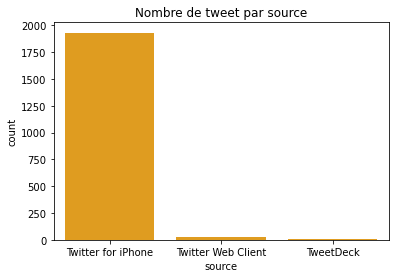

In [68]:
visualisationSource= sns.countplot(data = df, x = 'source', color = 'ORANGE')
visualisationSource.set_title('Nombre de tweet par source')

### Interpretation Visualisation 1
### <p style =" color : red; "> La grande partie des tweet provient de Twitter for iphone</p>

### Visualisation 2 : relation entre favorite_count et retweet_count

Text(0.5, 1.0, 'Relation entre rtweet_count et favorite_count')

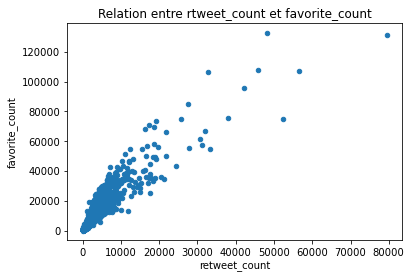

In [69]:
df.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter')
plt.pyplot.title('Relation entre rtweet_count et favorite_count')

### Intepretation Visualisation 2
### <p style="color: red; line-height: 35px; ">Ce graphique nous montre une zone vraiment pleine. et cela nous aide à déduire que la plupart des tweet ont 12 000 retweet et 38 000 like. Et que le nombre de retweet pour un tweet est plus grand que le nombre de favori qu'il obtient. </p>

### Visualisation 3 : Comment évolue le nombre de favorite et de retweet avec le temps?

3. Comment évolue le nombre de like et retweet avec le temps?


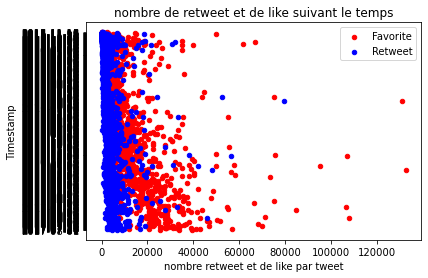

In [70]:
print("3. Comment évolue le nombre de like et retweet avec le temps?")
favoriteByTweet = df.plot(kind='scatter', y='timestamp', x='favorite_count', color='red')    
retweetByTweet = df.plot(kind='scatter', y='timestamp', x='retweet_count', color='blue',ax=favoriteByTweet)    
plt.pyplot.xlabel("nombre retweet et de like par tweet")
plt.pyplot.ylabel('Timestamp')
plt.pyplot.title('nombre de retweet et de like suivant le temps')
plt.pyplot.legend(["Favorite", "Retweet"])

### Intepretation Visualisation 3
### <p style="color: red; line-height: 35px; ">Ce graphique nous montre évolution du nombre de like et de retwwet dans le temps. c'est à dire, plus le temps évolue, plus les gens ont tendances à plus liker et à plus retweeter. Le nombre de like(favori) est plus grand que le nombre de retweet. </p>